<a href="https://colab.research.google.com/github/AndrewPrasaath/Movie-Review-Sentiment-analysis/blob/master/movie_review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing essential libraries**

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

**Creating dataframe**

In [47]:
#loading the data
movie_review_data = pd.read_table('/content/drive/My Drive/Smartknowers major project/SmartKnowers major project - movie review sentiment analysis/movie review.tsv')
movie_review_data.head(10)

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos
5,0,cv000,29590,5,if you can get past the whole comic book thing...,pos
6,0,cv000,29590,6,getting the hughes brothers to direct this see...,pos
7,0,cv000,29590,7,"the ghetto in question is , of course , whitec...",pos
8,0,cv000,29590,8,"it's a filthy , sooty place where the whores (...",pos
9,0,cv000,29590,9,"when the first stiff turns up , copper peter g...",pos


In [48]:
#droping unwanted columns
movie_review_data.drop(['fold_id', 'cv_tag', 'html_id', 'sent_id'], axis=1, inplace=True)
movie_review_data.head(10)

,text,tag
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos
5,if you can get past the whole comic book thing...,pos
6,getting the hughes brothers to direct this see...,pos
7,"the ghetto in question is , of course , whitec...",pos
8,"it's a filthy , sooty place where the whores (...",pos
9,"when the first stiff turns up , copper peter g...",pos


In [49]:
#shuffling the data
movie_review_data = movie_review_data.sample(frac=1)
movie_review_data.head(10)

,text,tag
51038,it's great !,neg
58247,i forgot to mention the prologue .,neg
62924,when they discover that nixon ( another dead-o...,neg
60223,-ed . ],neg
20121,"the story moves well , and before you know it ...",pos
45334,"what this film needs to be is a lot longer , a...",neg
29407,also there is a fair bit of action in the film...,pos
12155,"after the feature , which runs about 63 minute...",pos
43601,"the film involves a mysterious briefcase , tha...",neg
15125,"as an attack occurs , the front-page headline ...",pos


**Giving insights about the data**

In [50]:
movie_review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64471 entries, 51038 to 9358
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    64471 non-null  object
 1   tag     64471 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [51]:
movie_review_data.describe()

,text,tag
count,64471,64471
unique,63403,2
top,.,pos
freq,123,32754


In [52]:
movie_review_data['tag'].value_counts()


pos    32754
neg    31717
Name: tag, dtype: int64

**Visualization**

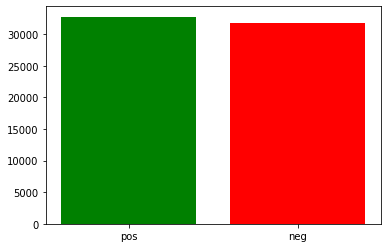

In [53]:
#creating labels and langs for bar chart
tag_names = movie_review_data['tag'].value_counts().keys().tolist()
tag_counts = movie_review_data['tag'].value_counts().tolist()
#plotting bar chart
plt.bar(tag_names, tag_counts, color = ('g','r'))
plt.show()

7719397


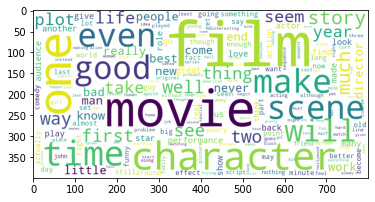

In [54]:
#wordcloud visualization
text=" "
stopwords=set(STOPWORDS)
stopwords.add('br')
for rev in movie_review_data.text:
  rev=str(rev)
  array=rev.split()
  for i in range(len(array)):
    array[i]=array[i].lower()

  text += " " .join(array) + " "

print(len(text))

wordcloud=WordCloud(stopwords=stopwords,scale=2,collocations=False,background_color='white').generate(text)
plt.imshow(wordcloud)
plt.show()


**Dividing into input and output and then split it into train and test data**

In [55]:
#input and output
x = movie_review_data.iloc[:,0].values
y = movie_review_data.iloc[:,1].values

#spliting into train & test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(45129,)
(19342,)


**Convert text input into numerical and fitting ML model (creating pipline)**

In [56]:
#pipline creationg
review_model = Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])
#fitting the model
review_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

**Predicting the output using test data and comparing with original test output data**

In [57]:
y_pred = review_model.predict(x_test)
print(y_pred)
print(y_test)

['pos' 'neg' 'neg' ... 'pos' 'neg' 'neg']
['pos' 'neg' 'neg' ... 'pos' 'pos' 'neg']


**Evaluation of the model**

In [58]:
#Accuracy 
accuracy_score(y_pred, y_test)*100

70.9905904249819

In [59]:
#confusion matrix
confusion_matrix(y_pred, y_test)

array([[6433, 2534],
       [3077, 7298]])

In [60]:
#Classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         neg       0.68      0.72      0.70      8967
         pos       0.74      0.70      0.72     10375

    accuracy                           0.71     19342
   macro avg       0.71      0.71      0.71     19342
weighted avg       0.71      0.71      0.71     19342



**Testing the model with own text**

In [61]:
#positve comment
print(review_model.predict(['i really loved this movie, especially the climax']))
#negative comment
print(review_model.predict(['the acting of the hero is ridiculous and the climax is not upto expectation']))

['pos']
['neg']
